In [1]:
import requests
import numpy as np
import pandas as pd

demo = '31fa1a9122c9b0d18024b5eb2d9ef148'

'''marketCapMoreThan & marketCapLowerThan : Number
betaMoreThan & betaLowerThan : Number
volumeMoreThan & volumeLowerThan : Number
dividendMoreThan & dividendLowerThan : Number
sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages Non-Alcoholic
exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
limit : Number'''

sector = 'Technology'
exchange = 'NASDAQ'
marketcapmorethan = '1000000000'
number_of_companies = 100
symbols = []

screener = requests.get(f'https://financialmodelingprep.com/api/v3/stock-screener?{marketcapmorethan}=1000000000&volumeMoreThan=10000&sector={sector}&exchange={exchange}&limit={number_of_companies}&apikey={demo}').json()
for item in screener:
    symbols.append(item['symbol'])
symbols

['AAPL',
 'MSFT',
 'NVDA',
 'ADBE',
 'INTC',
 'CSCO',
 'ASML',
 'AVGO',
 'QCOM',
 'TXN',
 'AMD',
 'INTU',
 'FISV',
 'AMAT',
 'LRCX',
 'ADSK',
 'MU',
 'ADI',
 'WDAY',
 'TEAM',
 'ERIC',
 'DOCU',
 'CTSH',
 'NXPI',
 'KLAC',
 'MB',
 'SPLK',
 'CDNS',
 'SNPS',
 'ANSS',
 'XLNX',
 'MCHP',
 'OKTA',
 'DDOG',
 'SWKS',
 'VRSN',
 'MRVL',
 'CRWD',
 'TTD',
 'FTNT',
 'GRMN',
 'COUP',
 'CA',
 'MXIM',
 'AKAM',
 'CHKP',
 'CTXS',
 'CDW',
 'ZS',
 'SSNC',
 'ZBRA',
 'WIX',
 'QRVO',
 'TER',
 'JKHY',
 'NICE',
 'NLOK',
 'STNE',
 'SYMC',
 'TRMB',
 'LOGI',
 'GDS',
 'MPWR',
 'OTEX',
 'CGNX',
 'STX',
 'SEDG',
 'WDC',
 'ULTI',
 'PTC',
 'MDB',
 'UBNT',
 'ENTG',
 'PEGA',
 'NTAP',
 'ENPH',
 'ON',
 'LYFT',
 'OLED',
 'IPGP',
 'FFIV',
 'DOX',
 'NUAN',
 'AZPN',
 'DBX',
 'MSCC',
 'FSLR',
 'CREE',
 'FIVN',
 'WB',
 'PCTY',
 'LITE',
 'MKSI',
 'KC',
 'IDTI',
 'RP',
 'PFPT',
 'MANH',
 'SPIL',
 'CAVM']

In [2]:
FinMetrics = {}
for company in symbols:
    try:
        companydata = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{company}?apikey={demo}').json()
        IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?period=quarter&apikey={demo}').json()
        BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarter&apikey={demo}').json()
        CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?period=quarter&apikey={demo}').json()
        #revenue last 4 years
        revenue = [IS[0]['revenue'],IS[1]['revenue'],IS[2]['revenue'],IS[3]['revenue']]
        revenue = np.array(revenue).sum()
        net_income = [IS[0]['netIncome'],IS[1]['netIncome'],IS[2]['netIncome'],IS[3]['netIncome']]
        net_income = np.array(net_income).sum()

        FCF = CF[0]['freeCashFlow'] + CF[1]['freeCashFlow'] + CF[2]['freeCashFlow'] + CF[3]['freeCashFlow']
        OperatingCF = CF[0]['operatingCashFlow'] + CF[1]['operatingCashFlow'] + CF[2]['operatingCashFlow'] + CF[3]['operatingCashFlow']
        total_debt = BS[0]['totalDebt']

        eps_diluted = [IS[0]['epsdiluted'],IS[1]['epsdiluted'],IS[2]['epsdiluted'],IS[3]['epsdiluted']]
        eps_diluted = np.array(eps_diluted).sum()

        total_shareholders_equity = BS[0]['totalStockholdersEquity']
        shareholders_equity_2_quarters_Average = (BS[0]['totalStockholdersEquity'] + BS[1]['totalStockholdersEquity']) / 2

        total_assets_2qts = (BS[0]['totalAssets'] + BS[1]['totalAssets']) / 2

        latest_Annual_Dividend = companydata[0]['lastDiv']
        price = companydata[0]['price']
        market_Capitalization = companydata[0]['mktCap']
        name = companydata[0]['companyName']
        exchange = companydata[0]['exchange']
        EBITDATTM = IS[0]['ebitda'] + IS[1]['ebitda'] + IS[2]['ebitda'] + IS[3]['ebitda']
        EBITDA5YTTM = IS[20]['ebitda'] + IS[21]['ebitda'] + IS[22]['ebitda'] + IS[23]['ebitda']
        EBITDA5YGrowht = (( EBITDATTM - EBITDA5YTTM) / EBITDA5YTTM)*100

        grossprofitma12TTMgrowht = ((IS[0]['grossProfitRatio'] - IS[3]['grossProfitRatio']) / IS[3]['grossProfitRatio']) *100

        dividend_Yield= latest_Annual_Dividend/price
        FinMetrics[company] = {}
        FinMetrics[company]['Dividend_Yield'] = dividend_Yield * 100
        FinMetrics[company]['latest_Price'] = price
        FinMetrics[company]['latest_Dividend'] = latest_Annual_Dividend
        FinMetrics[company]['market_Capit_in_M'] = market_Capitalization/1000000
        FinMetrics[company]['pe'] = price / eps_diluted
        FinMetrics[company]['ps'] = market_Capitalization / revenue
        FinMetrics[company]['pb'] = market_Capitalization / total_shareholders_equity
        FinMetrics[company]['PEG'] = FinMetrics[company]['pe'] / EBITDA5YGrowht
        FinMetrics[company]['GPM'] = IS[0]['grossProfitRatio']
        FinMetrics[company]['latest_Financials'] = IS[0]['date']
        FinMetrics[company]['GPM12TTMGrowth'] = grossprofitma12TTMgrowht
        FinMetrics[company]['Revenue_last6qts_inM'] = [IS[0]['revenue'],IS[1]['revenue'],IS[2]['revenue'],IS[3]['revenue'],IS[4]['revenue'],IS[5]['revenue']]
        FinMetrics[company]['Revenue_last6qts_inM'] = np.array(FinMetrics[company]['Revenue_last6qts_inM']) / 1000000
        FinMetrics[company]['ptoOperatingCF'] = market_Capitalization / OperatingCF

        FinMetrics[company]['ptoFCF'] = market_Capitalization / FCF
        FinMetrics[company]['Debt_to_Equity'] = total_debt / total_shareholders_equity
        FinMetrics[company]['ROE'] = net_income / shareholders_equity_2_quarters_Average
        FinMetrics[company]['ROA'] = net_income / total_assets_2qts

        FinMetrics[company]['revenue_growht_4qrts'] = ((IS[0]['revenue'] -  IS[3]['revenue'])/ IS[3]['revenue']) *100
        FinMetrics[company]['earnings_growht_4qrts'] = ((IS[0]['netIncome'] -  IS[3]['netIncome'])/ IS[3]['netIncome']) *100

    except:
        pass
   

In [3]:
all_measures= pd.DataFrame.from_dict(FinMetrics,orient='index')
print(all_measures.head(5))

      Dividend_Yield  latest_Price  latest_Dividend  market_Capit_in_M  \
AAPL        0.691861        459.63            3.180        1965207.850   
MSFT        0.952609        208.90            1.990        1580881.940   
NVDA        0.138360        462.56            0.640         284474.409   
ADBE        0.000000        447.60            0.000         214698.050   
INTC        2.669258         48.89            1.305         207929.164   

             pe         ps         pb       PEG       GPM latest_Financials  \
AAPL  34.933645   7.176037  27.188067  8.542172  0.379995        2020-06-27   
MSFT  36.149874  11.053959  13.362878  0.211358  0.675571        2020-06-30   
NVDA  85.658942  24.153032  21.717262  0.268558  0.650649        2020-04-26   
ADBE  58.971944  17.824557  19.731463  0.141013  0.867327        2020-05-29   
INTC   8.871541   2.633515   2.535412  0.132351  0.532593        2020-06-27   

      GPM12TTMGrowth                               Revenue_last6qts_inM  \
AAPL 

In [6]:
#keep only companies with a PE higher than 10
price_earnings = all_measures[all_measures['pe'] > 0]

#filter option 1
price_earnings = price_earnings[(price_earnings['pe'] < 30) & (price_earnings['ps'] < 20) & (price_earnings['pb'] < 20) & (price_earnings['ptoFCF'] < 20)]

#filter option 2
#price_earnings = price_earnings[(price_earnings['pe'] < 20) & (price_earnings['revenue_growht_4qrts'] > 10)]

#Sort entities to show companies with lower PE ratio first
price_earnings = price_earnings.sort_values('pe')
#keep only 8 companies:
price_earnings = price_earnings[0:8]

#calculate industry median for each of the ratios: 
price_earnings.loc[-1] = all_measures.median()
#rename the column
price_earnings.rename(index={-1: "median_industry"},inplace=True)

print(price_earnings)

                 Dividend_Yield  latest_Price  latest_Dividend  \
INTC                   2.669258         48.89            1.305   
STX                    5.724429         45.07            2.580   
NLOK                  54.319372         22.92           12.450   
SYMC                   1.501502         19.98            0.300   
CSCO                   3.341176         42.50            1.420   
CTXS                   1.026769        136.35            1.400   
DOX                    1.983819         61.80            1.226   
CTSH                   1.255043         66.93            0.840   
median_industry        0.138360        106.80            0.215   

                 market_Capit_in_M         pe        ps          pb  \
INTC                   207929.1640   8.871541  2.633515    2.535412   
STX                     11603.8124  11.263107  1.104179    6.493460   
NLOK                    13545.7894  11.875648  7.294448  -26.929999   
SYMC                    13206.7800  14.070423  3.610383

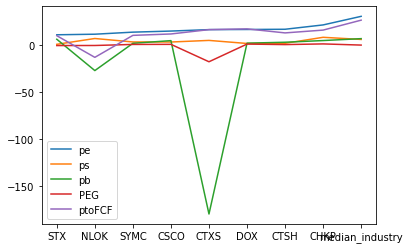

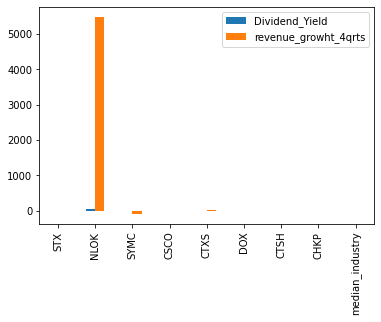

In [5]:
price_earnings[['pe','ps','pb','PEG','ptoFCF']].plot()
price_earnings[['Dividend_Yield','revenue_growht_4qrts']].plot(kind="bar")